# A/B-тест для интернет-магазина

<p><b>Описание</b>
<p>Нужно проверить гипотезы для увеличения прибыли.Есть датасеты с данными по гипотезам и датасет результатов A/B теста
<p><b>Задачи</b>
<p>Часть I.Провести приоритезацию гипотез при помощи фреймворка ICE и RICE
<p>Часть II.Проанализировать результаты A/B теста(построить нужные графики, провести статистические тесты)
<p> 1.Построить график кумулятивной выручки по группам. Сделайте выводы и предположения.
<p>    2.Построить  график кумулятивного среднего чека по группам. Сделать выводы и предположения.
   <p> 3.Построить  график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.
    <p>4.Построить  график кумулятивной конверсии по группам. Сделать выводы и предположения.
    <p>5.Построить  график относительного изменения кумулятивной конверсии группы B к группе A. Сделать выводы и предположения.
    <p>6.Построить  точечный график количества заказов по пользователям. Сделать выводы и предположения.
    <p>7.Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.
    <p>8.Построить точечный график стоимостей заказов. Сделать выводы и предположения.
    <p>9.Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.
    <p>10.Посчитать статистическую значимость различий в конверсии между группами по «сырым» данным. Сделать выводы и предположения.
    <p>11.Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.
    <p>12.Посчитать статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделать выводы и предположения.
    <p>13.Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.
    <p>14.Принять решение по результатам теста. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

In [1]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
hypothesis = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')
orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')
visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')

# Часть I<p> Провести приоритезацию гипотез при помощи фреймворка ICE и RICE 

In [3]:
pd.options.display.max_colwidth = 100

In [4]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [5]:
hypothesis['ICE']=(hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']).round(1)
hypothesis.sort_values('ICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3,8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3,7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0


In [6]:
hypothesis['RICE']=hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
hypothesis.sort_values('RICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3,7.0,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3,8.0,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.1,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.3,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0,3.0


<b><p>Вывод:</b>
<p>После применения фреймворка RICE в топ-5 гипотез вошли такие-же гипотезы как и при применении ICE. Изменились только их позиции. 
<p>"Запустить акцию, дающую скидку на товар в день рождения" переместилась с первого места на пятое.
<p>"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" переместилась со второго на третье.
<p>"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" переместилась с третьего на  первое.
<p>"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию" осталось на прежнем четвертом месте.
<p>"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа" переместилась с  пятого на  второе
<b><p>Изменения связаны с компонентом Reach. Этот компонент влияет на величину числителя и соответственно на итоговую цифру. Reach показывает оценку того скольких пользователей затронет изменение.

# Часть II <p>Проанализировать результаты A/B теста

<b>0. Предобработка данных

Проверяем на дубликаты и пропуски

In [7]:
print('Кол-во явных дубликатов:', orders.duplicated().sum())
print('Пропуски:')
print(orders.isna().sum())

Кол-во явных дубликатов: 0
Пропуски:
transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64


In [8]:
print('Кол-во явных дубликатов:', visitors.duplicated().sum())
print('Пропуски:')
print(visitors.isna().sum())

Кол-во явных дубликатов: 0
Пропуски:
date        0
group       0
visitors    0
dtype: int64


Меняем типы данных

In [9]:
orders['date'] = pd.to_datetime(orders['date']).dt.date
visitors['date']=pd.to_datetime(visitors['date']).dt.date

Определяем временные рамки теста

In [10]:
print('Группы теста:' ,orders['group'].unique()) 
print('Начало теста:', orders['date'].min())
print('Окончание теста:', orders['date'].max())   
print('Длительность теста:', orders['date'].max() - orders['date'].min())  

Группы теста: ['B' 'A']
Начало теста: 2019-08-01
Окончание теста: 2019-08-31
Длительность теста: 30 days, 0:00:00


Определяем объемы групп теста

In [11]:
print('Кол-во групп в группе А:', visitors.query('group=="A"')['visitors'].sum())
print('Кол-во групп в группе B:', visitors.query('group=="B"')['visitors'].sum())


Кол-во групп в группе А: 18736
Кол-во групп в группе B: 18916


Проверяем на пересечения

In [12]:
A=orders.query('group=="A"')
B=orders.query('group=="B"')

In [13]:
repeats = []
for i in A['visitorId'].unique():
    if i in B['visitorId'].unique():
        repeats.append(i)

In [14]:
print('Пересекающиеся пользователи(кол-во):',len(repeats))

Пересекающиеся пользователи(кол-во): 58


In [15]:
orders=orders.query('visitorId not in @repeats')

### График кумулятивной выручки по группам

Подготовка данных к визуализации

In [16]:
orders['date'] = pd.to_datetime(orders['date']).dt.date
dates_groups=pd.DataFrame(orders[['date', 'group']]).drop_duplicates()
orders_aggregated=dates_groups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'transactionId' : pd.Series.nunique,
'visitorId' : pd.Series.nunique,
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group']) 

In [17]:
visitors['date']=pd.to_datetime(visitors['date']).dt.date
visitors_aggregated = dates_groups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <=x['date'], visitors['group']== x['group'])].agg({
        'date':'max',
        'group':'max',
        'visitors':'sum'}), axis=1).sort_values(by=['date','group']) 

In [18]:
cumulative_data=orders_aggregated.merge(visitors_aggregated, on =['date','group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [19]:
cumulative_revenue_A = cumulative_data.query('group=="A"')
cumulative_revenue_B = cumulative_data.query('group=="B"')

Визуализация данных

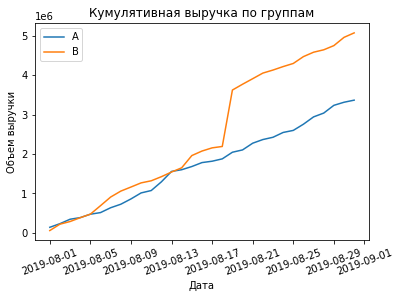

In [20]:
plt.xticks(rotation=20)
plt.plot(cumulative_revenue_A['date'], cumulative_revenue_A['revenue'], label='A')
plt.plot(cumulative_revenue_B['date'], cumulative_revenue_B['revenue'], label='B')
plt.title('Кумулятивная выручка по группам')
plt.xlabel('Дата')
plt.ylabel('Объем выручки')
plt.legend() 
plt.show()

<p><b>Вывод:</b> 
   <p> Вначале выручка увеличивается относительно равномерно в обеих группах, но примерно восле 2019-08-17 наблюдается резкий скачок у группы B. Это может быть вызвано либо резким увеличением числа заказов, что повлияло на выручку, либо вызвано резким увеличением числа очень дорогих заказов. 

### График кумулятивного среднего чека по группам

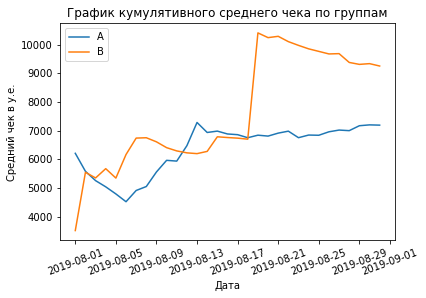

In [21]:
plt.xticks(rotation=20)
plt.plot(cumulative_revenue_A['date'], cumulative_revenue_A['revenue'] / cumulative_revenue_A['orders'], label='A')
plt.plot(cumulative_revenue_B['date'], cumulative_revenue_B['revenue'] / cumulative_revenue_B['orders'], label='В')
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек в у.е.')
plt.legend() 
plt.show()

<p><b>Вывод:</b> 
   <p>  Группа А показывает сильное понижение среднего чека  около 2019-08-05. Возможно число заказов увеличилось к этому времени в группе А, но цена покупок не была большой. Затем график группы А растет до пика около 2019-08-13 и затем ведет себя относительно стабильно в оствашийся период.
      <p>  Для группы В однозначно рано говорить о стабилизации так как график показал очень сильный всплеск после 2019-08-17. Это может быть вызвано увеличением числа дорогих заказов при относительно небольшом колебании самого числа заказов, что вызвало увеличение значения среднего чека. Возможны выбросы.

### График относительного изменения кумулятивного среднего чека группы B к группе A

In [22]:
merge_cumulative_revenue = cumulative_revenue_A.merge(cumulative_revenue_B, on='date', how='left', suffixes=['A', 'B'])

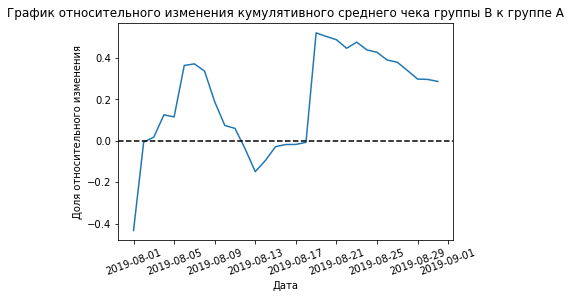

In [23]:
plt.xticks(rotation=20)
plt.plot(merge_cumulative_revenue['date'], (merge_cumulative_revenue['revenueB'] / merge_cumulative_revenue['ordersB'])/(merge_cumulative_revenue['revenueA'] / merge_cumulative_revenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--') 
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Доля относительного изменения')
plt.show()

<p><b>Вывод:</b> 
   <p> График неравномерен, заметны скачки.  Следовательно, в данных присутсвуют выбросы.
    <p> Изначально группа B отставала по показателю кумулятивной выручки,но затем показывала результаты лучше до 13 августа. Здесь заметно значительное снижение и отставание. После следует рост и резкий скачок. Можно предположить, что он возник из-за выбросов. Затем следует снижение, но группа В по прежнему лидирует. 

### График кумулятивной конверсии по группам

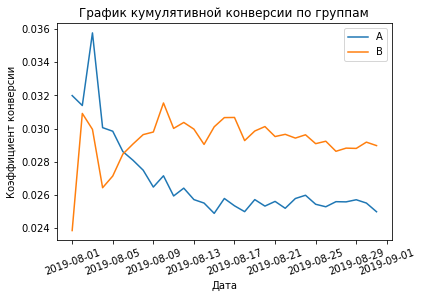

In [24]:
plt.xticks(rotation=20)
plt.plot(merge_cumulative_revenue['date'], (merge_cumulative_revenue['ordersA']/merge_cumulative_revenue['visitorsA']), label='A')
plt.plot(merge_cumulative_revenue['date'], (merge_cumulative_revenue['ordersB']/merge_cumulative_revenue['visitorsB']), label='B')
plt.title('График кумулятивной конверсии по группам')
plt.xlabel('Дата')
plt.ylabel('Коэффициент конверсии')
plt.legend()
plt.show()

<p><b>Вывод:</b> 
   <p> Графики сильно колеблются вначале, затем показатель кумулятивной конверсии группы В заметно опережает показатель группы А и относительно стабилизируется. Конверсия группы А тоже относительно стабилизируется.

### График относительного изменения кумулятивной конверсии группы B к группе A

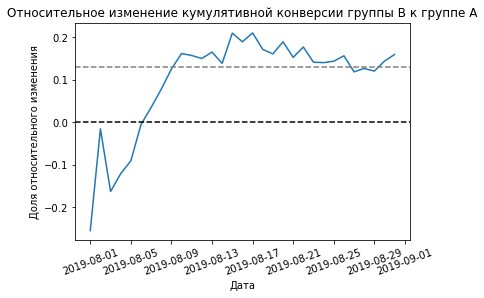

In [25]:
plt.xticks(rotation=20)
plt.plot(merge_cumulative_revenue['date'], (merge_cumulative_revenue['ordersB']/merge_cumulative_revenue['visitorsB'])/(merge_cumulative_revenue['ordersA']/merge_cumulative_revenue['visitorsA'])-1)
plt.title("Относительное изменение кумулятивной конверсии группы B к группе A")
plt.xlabel('Дата')
plt.ylabel('Доля относительного изменения')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.13, color='grey', linestyle='--')
plt.show()

<p><b>Вывод:</b> 
   <p> Можно увидеть, что вначале группа В колеблется от положительного значения относительного изменения к отрицательному, затем сильно падает к отрицательному значению, что показывает насколько кумулятивная конверсия группы В меньше группы А. С 17 августа наблюдается тенденция к росту показателя, но затем следует снижение. Следовательно, трудно говорить о стабилизации показателя. Нужно провести анализ выбросов. 

### Точечный график количества заказов по пользователям

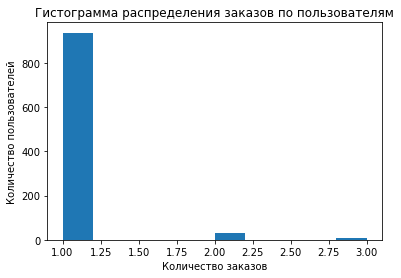

In [26]:
orders_by_users=orders.groupby('visitorId', as_index=False).agg({'transactionId':'nunique'})
plt.hist(orders_by_users['transactionId'])
plt.title('Гистограмма распределения заказов по пользователям')
plt.xlabel('Количество заказов')
plt.ylabel('Количество пользователей')
plt.show()

В основном пользователи делали один и не более двух заказов. Также существует доля пользователей которые делали больше двух заказов.

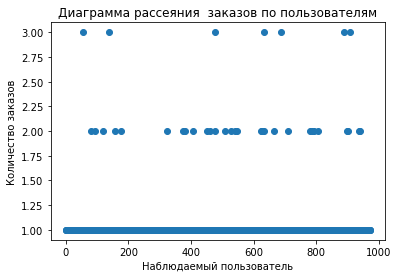

In [27]:
plt.scatter(pd.Series(range(0,len(orders_by_users))),orders_by_users['transactionId'] )
plt.title('Диаграмма рассеяния  заказов по пользователям')
plt.ylabel('Количество заказов')
plt.xlabel('Наблюдаемый пользователь')
plt.show()

Диаграмма рассеяния также подтверждает выводы выше. Хорошо заметны аномальные значения. Чтобы принять решение о том, какое значение считать порогом для выбросов нужно посчитать перцентили.

In [28]:
print(np.percentile(orders_by_users['transactionId'],[95, 99]))

[1. 2.]


Не более 5% пользователей делали более одного заказа. Менее процента пользователей делали более 2 заказов. <b>Нижней границей для выбросов можно определить значение в 2 заказа на пользователя. 

### Точечный график стоимостей заказов

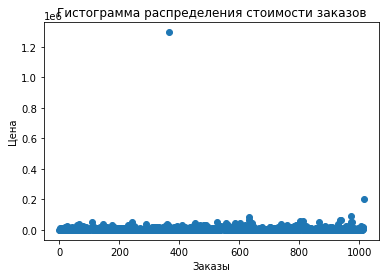

In [29]:
plt.scatter(pd.Series(range(0, len(orders['revenue']))), orders['revenue'])
plt.title('Гистограмма распределения стоимости заказов')
plt.xlabel('Заказы')
plt.ylabel('Цена')
plt.show()

In [30]:
x=orders.query('revenue <=100000')

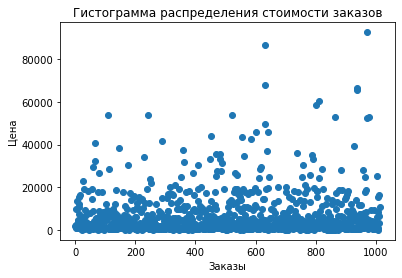

In [31]:
plt.scatter(pd.Series(range(0, len(x['revenue']))), x['revenue'])
plt.title('Гистограмма распределения стоимости заказов')
plt.xlabel('Заказы')
plt.ylabel('Цена')
plt.show()

На данном графике видно, что большинство значений плотно расположены внизу графика.Заметны два выброса,которые значительно выделяются(Значение больше 1200000 и значение около 200000).Эти выбросы самые заментые. Для точной оценки нужно посчитать перцентили.

In [32]:
print(np.percentile(orders['revenue'],[95, 99]))

[26785. 53904.]


Не более 5% заказов имели стоимость выше 26785. Не более процента заказов имели стоимость выше 53904. Нижний порог для выбросов можно обозначить значением 53904

### Статистическая значимость различий в конверсии между группами по «сырым» данным

<p>Поскольку в данных есть выбросы, то будет применяться критерий Манна-Уитни для проверки гипотез
<p> Уровень значимости будет определен значением в 5%
<p>H0:Статистически значимых различий между конверсиями групп нет
<p>H1:Статистически значимые различия между конверсиями групп есть

In [33]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique}))


ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique}))

In [34]:
sampleA = pd.concat([ordersByUsersA['transactionId'], pd.Series(0, index=np.arange(visitors[visitors['group'] == 'A']['visitors'].sum() - ordersByUsersA ['visitorId'].count()), name='transactionId')],axis=0)
sampleB = pd.concat([ordersByUsersB['transactionId'], pd.Series(0, index=np.arange(visitors[visitors['group'] == 'B']['visitors'].sum() - ordersByUsersB ['visitorId'].count()), name='transactionId')],axis=0) 

In [35]:
print('p-value:', "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB,True,'less')[1]))

print('Относительное отличие средней конверсии группы В от А:', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value: 0.006
Относительное отличие средней конверсии группы В от А: 0.160


<p><b>Вывод:</b>
<p>Поскольку p-value меньше 5%, то есть основание отвергнуть гипотезу о равенстве конверсий, разница статистически значима. Следовательно конверсии разные для групп по сырым данным. Относительное отличие средней конверсии группы В от А = 16 %

 ### Cтатистическая значимость различий в среднем чеке заказа между группами по «сырым» данным.

H0:Статистически значимых различий между средними чеками групп нет
<p>H1:Статистически значимые различия между средними чеками групп есть

In [36]:
orders_for_middle_cost = orders.groupby(['date','group'], as_index=False).agg({'transactionId':'nunique','visitorId':'nunique','revenue':'sum'})
middle_cost_A = orders_for_middle_cost.query('group == "A"')['revenue'] / orders_for_middle_cost.query('group == "A"')['transactionId'] 
middle_cost_B = orders_for_middle_cost.query('group == "B"')['revenue'] / orders_for_middle_cost.query('group == "B"')['transactionId'] 

In [37]:
print('p-value:','{0:.3f}'.format(stats.mannwhitneyu(middle_cost_A,middle_cost_B, True,'less')[1]))
print('Относительное различие среднеего чека группы В к группе А:''{0:.3f}'.format(middle_cost_B.mean()/middle_cost_A.mean()-1))
print('Средний чек группы A:',middle_cost_A.mean())
print('Средний чек группы B:',middle_cost_B.mean())

p-value: 0.528
Относительное различие среднеего чека группы В к группе А:0.203
Средний чек группы A: 7309.427132974742
Средний чек группы B: 8795.244488730668


<p><b>Вывод:</b>
<p>Поскольку p-value больше 5%,то нельзя отклонить нулевую гипотезу о равенстве среднего чека групп по сырым данным. Статистически значимых различий нет

### Статистическая значимость различий в конверсии между группами по «очищенным» данным.

In [40]:
clean_orders = orders.query('revenue <=53904')# Данные без выбросов по стоимости заказов

In [42]:
clean_orders = clean_orders.groupby(['date','group'], as_index=False).agg({'transactionId':'nunique','visitorId':'nunique', 'revenue':'sum'})

H0:Статистически значимых различий между конверсиями групп нет
<p>H1:Статистически значимые различия между конверсиями групп есть

In [43]:
ordersByUsersA1 = (
    clean_orders[clean_orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique}))


ordersByUsersB1 = (
     clean_orders[clean_orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique}))

In [44]:
sampleA1 = pd.concat([ordersByUsersA['transactionId'], pd.Series(0, index=np.arange(visitors[visitors['group'] == 'A']['visitors'].sum() - ordersByUsersA1 ['visitorId'].count()), name='transactionId')],axis=0)
sampleB1 = pd.concat([ordersByUsersB['transactionId'], pd.Series(0, index=np.arange(visitors[visitors['group'] == 'B']['visitors'].sum() - ordersByUsersB1 ['visitorId'].count()), name='transactionId')],axis=0) 

In [45]:
print('p-value:', "{0:.3f}".format(stats.mannwhitneyu(sampleA1, sampleB1,True,'less')[1]))

print('Относительное отличие средней конверсии группы В от А:', "{0:.3f}".format(sampleB1.mean() / sampleA1.mean() - 1))

p-value: 0.007
Относительное отличие средней конверсии группы В от А: 0.155


<b>Вывод:</b>
<p>Поскольку p-value меньше 0.05, то есть основание отвергнуть нулевую гипотезу и предположить, что между группами есть статистически значимое различие. Поскольку вероятность получить такое или большее различие между группами случайно крайне низкая. Также средняя конверсия группы В больше средней конверсии группы А на 15,5%.

### Cтатистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

H0:Статистически значимых различий между средними чеками групп нет
<p>H1:Статистически значимые различия между средними чеками групп есть

In [47]:
clean_orders_middle_cost = orders.query('revenue <=58233').groupby(['date','group'], as_index=False).agg({'transactionId':'nunique','visitorId':'nunique', 'revenue':'sum'})
clean_middle_cost_A = clean_orders_middle_cost.query('group=="A"')['revenue'] / clean_orders_middle_cost.query('group=="A"')['transactionId']
clean_middle_cost_B = clean_orders_middle_cost.query('group=="B"')['revenue'] / clean_orders_middle_cost.query('group=="B"')['transactionId']

In [48]:
print('p-value:','{0:.3f}'.format(stats.mannwhitneyu(clean_middle_cost_A,clean_middle_cost_B)[1]))
print('Относительное различие среднеего чека группы В к группе А:''{0:.3f}'.format(clean_middle_cost_B.mean()/clean_middle_cost_A.mean()-1))
print('Средний чек группы A:',clean_middle_cost_A.mean())
print('Средний чек группы B:',clean_middle_cost_B.mean())

p-value: 0.652
Относительное различие среднеего чека группы В к группе А:-0.061
Средний чек группы A: 6651.792336107772
Средний чек группы B: 6244.737064756793


<b>Вывод:</b>
<p> p-value больше 5%. Отвергнуть нулевую гипотезу о равенстве средних чеков групп по чистым данным нельзя

## Общие выводы

<b><p>1.По сырым данным статистически значимо конверсии групп отличаются. Конверсия группы В больше группы А на 16%
<b><p>2.По данным без выбросов между группами есть статистически значимое различие по конверсии . Конверсия группы В больше группы А на 15.5%
<b><p>3.По сырым данным  статистически значимое различие по среднему чеку не выявлено
<b><p>4.По чистым данным в средних чеках групп статистически значимое различие не выявлено

In [49]:
clean_dates_groups=pd.DataFrame(clean_orders[['date', 'group']]).drop_duplicates()

In [50]:
clean_orders_aggregated=clean_dates_groups.apply(
    lambda x: clean_orders[np.logical_and(clean_orders['date'] <= x['date'], clean_orders['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'transactionId' : pd.Series.nunique,
'visitorId' : pd.Series.nunique,
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group']) 

<b> 5.По чистым данным кумулятивная выручка группы В лучше группы А и имеет тенденцию к росту.

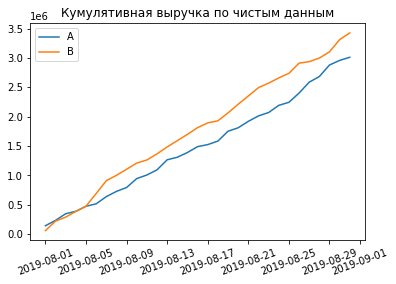

In [51]:
plt.xticks(rotation=20)
plt.plot(clean_orders_aggregated.query('group=="A"')['date'], clean_orders_aggregated.query('group=="A"')['revenue'], label='A')
plt.plot(clean_orders_aggregated.query('group=="B"')['date'], clean_orders_aggregated.query('group=="B"')['revenue'], label='B')
plt.legend()
plt.title("Кумулятивная выручка по чистым данным")
plt.show()

<b> 6.По чистым данным изменения кумулятивного среднего чека показывают, что результаты группы B лучше и стремятся к стабилизации около среднего.

In [52]:
clean_revenue_A = clean_orders_aggregated.query('group=="A"')
clean_revenue_B = clean_orders_aggregated.query('group=="B"')

In [53]:
merge_clean_revenue = clean_revenue_A.merge(clean_revenue_B, on='date', how='left', suffixes=['A', 'B'])

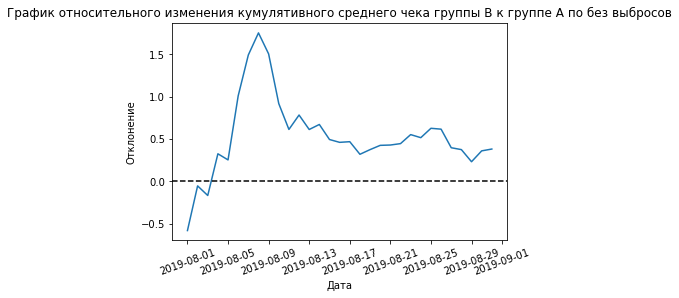

In [54]:
plt.xticks(rotation=20)
plt.plot(merge_clean_revenue['date'], (merge_clean_revenue['revenueB'] / merge_clean_revenue['transactionIdB'])/(merge_clean_revenue['revenueA'] / merge_clean_revenue['transactionIdA'])-1)
plt.axhline(y=0, color='black', linestyle='--') 
plt.title("График относительного изменения кумулятивного среднего чека группы B к группе A по без выбросов")
plt.xlabel('Дата')
plt.ylabel('Отклонение')
plt.show()


<b>Вывод: Тест можно остановить и признать удачным. Группа B положительно отличается от группы А по кумулятивным метрикам. Статистически значимые отличия групп были обнаружены между конверсиями групп